ÍNDICE  
    1. LIMPIEZA Y VISUALIZACIÓN  
    1.1 TRATAMIENTO DE DATOS  
    2.ANÁLISIS EXPLORATORIO DE DATOS (EDA)   
    2.1 DISTRIBUCIÓN Y COMPORTAMIENTO DE LOS DATOS   
    3. ANÁLISIS DE DATOS CONFIRMATORIO (CDA)  
    4. MACHINE LEARNING  
    5. EXTRA

# <center> 1. LIMPIEZA Y VISUALIZACIÓN

In [1]:
#Importación de bibliotecas
import pandas as pd
import numpy as np
import pycaret

In [2]:
#Carga de datos
df = pd.read_csv('dataV2.csv')

In [3]:
# Exploración inicial
print(df.head())


       Usuario  Puntuación_influence Seguidores Media_likes Posts  \
0    cristiano                  92.0     612.6m        8.9m  3.6k   
1     leomessi                  90.0     493.1m        7.6m  1.1k   
2  selenagomez                  93.0     430.1m        6.7m  2.0k   
3  kyliejenner                  91.0     398.9m        8.0m  6.9k   
4      therock                  91.0     392.8m        1.7m  7.5k   

  Tasa_interacción_60d Media_Likes_Post_Nuevo Total_Likes            País  \
0                 1.1%                   6.5m       31.7b        Portugal   
1                 1.0%                   4.6m        8.7b       Argentina   
2                 1.0%                   4.1m       13.1b  Estados Unidos   
3                 0.7%                   2.9m       54.9b  Estados Unidos   
4                 0.3%                 982.9k       12.5b  Estados Unidos   

  Idioma_principal  
0           Inglés  
1          Español  
2           Inglés  
3           Inglés  
4           Inglé

In [4]:
df

,Usuario,Puntuación_influence,Seguidores,Media_likes,Posts,Tasa_interacción_60d,Media_Likes_Post_Nuevo,Total_Likes,País,Idioma_principal
0,cristiano,92.0,612.6m,8.9m,3.6k,1.1%,6.5m,31.7b,Portugal,Inglés
1,leomessi,90.0,493.1m,7.6m,1.1k,1.0%,4.6m,8.7b,Argentina,Español
2,selenagomez,93.0,430.1m,6.7m,2.0k,1.0%,4.1m,13.1b,Estados Unidos,Inglés
3,kyliejenner,91.0,398.9m,8.0m,6.9k,0.7%,2.9m,54.9b,Estados Unidos,Inglés
4,therock,91.0,392.8m,1.7m,7.5k,0.3%,982.9k,12.5b,Estados Unidos,Inglés
...,...,...,...,...,...,...,...,...,...,...
195,frenchmontana,72.0,37.5m,138.2k,160,0.4%,148.9k,22.1m,Estados Unidos,Inglés
196,bmw,79.0,37.5m,213.4k,10.0k,0.3%,104.2k,2.1b,Alemania,Inglés
197,madhuridixitnene,76.0,37.2m,369.7k,1.6k,0.6%,227.2k,593.7m,India,Inglés
198,addisonraee,85.0,36.8m,2.8m,165,1.1%,382.8k,464.0m,Estados Unidos,Inglés


In [5]:
# Observamos los tipos de datos de cada columna:

print(df.info()) #muestra info del tipo de datos y cantidad de nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Usuario                 200 non-null    object 
 1   Puntuación_influence    200 non-null    float64
 2   Seguidores              200 non-null    object 
 3   Media_likes             200 non-null    object 
 4   Posts                   200 non-null    object 
 5   Tasa_interacción_60d    200 non-null    object 
 6   Media_Likes_Post_Nuevo  200 non-null    object 
 7   Total_Likes             200 non-null    object 
 8   País                    200 non-null    object 
 9   Idioma_principal        200 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB
None


In [6]:
# Muestra la cantidad de filas duplicadas
print(df.duplicated().sum())

0


## 1.1 TRATAMIENTO DE DATOS

In [7]:
# eliminamos letras de columnas numéricas 

def convert_value(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        if 'm' in value:
            return float(value.replace('m', '')) * 1e6
        if 'b' in value:
            return float(value.replace('b', '')) * 1e9
    return value

In [8]:
# eliminamos % de columna 60_day_eng_rate 
def convert_percentage(value):
    if isinstance(value, str) and value.endswith('%'):
        return float(value.strip('%'))
    return value

In [9]:
# Aplicar la conversión a las columnas relevantes
df['Posts'] = df['Posts'].apply(convert_value)
df['Seguidores'] = df['Seguidores'].apply(convert_value)
df['Media_likes'] = df['Media_likes'].apply(convert_value)
df['Media_Likes_Post_Nuevo'] = df['Media_Likes_Post_Nuevo'].apply(convert_value)
df['Total_Likes'] = df['Total_Likes'].apply(convert_value)
df['Tasa_interacción_60d'] = df['Tasa_interacción_60d'].apply(convert_percentage)

# Mostrar el DataFrame convertido
print(df)

              Usuario  Puntuación_influence   Seguidores  Media_likes  \
0           cristiano                  92.0  612600000.0    8900000.0   
1            leomessi                  90.0  493100000.0    7600000.0   
2         selenagomez                  93.0  430100000.0    6700000.0   
3         kyliejenner                  91.0  398900000.0    8000000.0   
4             therock                  91.0  392800000.0    1700000.0   
..                ...                   ...          ...          ...   
195     frenchmontana                  72.0   37500000.0     138200.0   
196               bmw                  79.0   37500000.0     213400.0   
197  madhuridixitnene                  76.0   37200000.0     369700.0   
198       addisonraee                  85.0   36800000.0    2800000.0   
199      shaymitchell                  83.0   36700000.0     613200.0   

       Posts  Tasa_interacción_60d Media_Likes_Post_Nuevo   Total_Likes  \
0     3600.0                   1.1              

In [10]:
# vistazo a df
df.head()

,Usuario,Puntuación_influence,Seguidores,Media_likes,Posts,Tasa_interacción_60d,Media_Likes_Post_Nuevo,Total_Likes,País,Idioma_principal
0,cristiano,92.0,612600000.0,8900000.0,3600.0,1.1,6500000.0,3.170000e+10,Portugal,Inglés
1,leomessi,90.0,493100000.0,7600000.0,1100.0,1.0,4600000.0,8.700000e+09,Argentina,Español
2,selenagomez,93.0,430100000.0,6700000.0,2000.0,1.0,4100000.0,1.310000e+10,Estados Unidos,Inglés
3,kyliejenner,91.0,398900000.0,8000000.0,6900.0,0.7,2900000.0,5.490000e+10,Estados Unidos,Inglés
4,therock,91.0,392800000.0,1700000.0,7500.0,0.3,982900.0,1.250000e+10,Estados Unidos,Inglés


In [11]:
# Pasamos solo las columnas seleccionadas a enteros

cols_to_convert = ['Posts', 'Seguidores', 'Media_likes', 'Media_Likes_Post_Nuevo', 'Total_Likes']

for col in cols_to_convert:
    df[col] = df[col].apply(np.int64)

df.head()

,Usuario,Puntuación_influence,Seguidores,Media_likes,Posts,Tasa_interacción_60d,Media_Likes_Post_Nuevo,Total_Likes,País,Idioma_principal
0,cristiano,92.0,612600000,8900000,3600,1.1,6500000,31700000000,Portugal,Inglés
1,leomessi,90.0,493100000,7600000,1100,1.0,4600000,8700000000,Argentina,Español
2,selenagomez,93.0,430100000,6700000,2000,1.0,4099999,13100000000,Estados Unidos,Inglés
3,kyliejenner,91.0,398900000,8000000,6900,0.7,2900000,54900000000,Estados Unidos,Inglés
4,therock,91.0,392800000,1700000,7500,0.3,982900,12500000000,Estados Unidos,Inglés


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Usuario                 200 non-null    object 
 1   Puntuación_influence    200 non-null    float64
 2   Seguidores              200 non-null    int64  
 3   Media_likes             200 non-null    int64  
 4   Posts                   200 non-null    int64  
 5   Tasa_interacción_60d    200 non-null    float64
 6   Media_Likes_Post_Nuevo  200 non-null    int64  
 7   Total_Likes             200 non-null    int64  
 8   País                    200 non-null    object 
 9   Idioma_principal        200 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 15.8+ KB


In [13]:
# observamos los nulos por columna
print(df.isnull().sum()) 

Usuario                   0
Puntuación_influence      0
Seguidores                0
Media_likes               0
Posts                     0
Tasa_interacción_60d      0
Media_Likes_Post_Nuevo    0
Total_Likes               0
País                      0
Idioma_principal          0
dtype: int64


#### Creamos columna Total_Engagement

In [14]:
df['Total_interacciones']=df['Seguidores']*df['Tasa_interacción_60d']/100
df.head()

,Usuario,Puntuación_influence,Seguidores,Media_likes,Posts,Tasa_interacción_60d,Media_Likes_Post_Nuevo,Total_Likes,País,Idioma_principal,Total_interacciones
0,cristiano,92.0,612600000,8900000,3600,1.1,6500000,31700000000,Portugal,Inglés,6738600.0
1,leomessi,90.0,493100000,7600000,1100,1.0,4600000,8700000000,Argentina,Español,4931000.0
2,selenagomez,93.0,430100000,6700000,2000,1.0,4099999,13100000000,Estados Unidos,Inglés,4301000.0
3,kyliejenner,91.0,398900000,8000000,6900,0.7,2900000,54900000000,Estados Unidos,Inglés,2792300.0
4,therock,91.0,392800000,1700000,7500,0.3,982900,12500000000,Estados Unidos,Inglés,1178400.0


In [15]:
df.to_csv('dataV3.csv', index=False)

### Pasamos a numéricos los países y idioma principal de la cuenta

In [16]:
# cuantos países tenemos
df['País'].unique()

array(['Portugal', 'Argentina', 'Estados Unidos', 'Canada', 'India',
       'Brasil', 'España', 'Holanda', 'Francia', 'Tailandia', 'Colombia',
       'Reino Unido', 'Corea del Sur', 'Italia', 'Nueva Zelanda',
       'Uruguay', 'Indonesia', 'Turquía', 'Suecia', 'Egipto', 'Australia',
       'Puerto Rico', 'Suiza', 'Anguilla', 'Alemania', 'China', 'Mexico',
       'Islas Vírgenes Británicas'], dtype=object)

In [17]:
# crear lista de países con número asociado para encodear
countries = df['País'].unique()
countries_dict = {country: i for i, country in enumerate(countries, 1)}
countries_dict

{'Portugal': 1,
 'Argentina': 2,
 'Estados Unidos': 3,
 'Canada': 4,
 'India': 5,
 'Brasil': 6,
 'España': 7,
 'Holanda': 8,
 'Francia': 9,
 'Tailandia': 10,
 'Colombia': 11,
 'Reino Unido': 12,
 'Corea del Sur': 13,
 'Italia': 14,
 'Nueva Zelanda': 15,
 'Uruguay': 16,
 'Indonesia': 17,
 'Turquía': 18,
 'Suecia': 19,
 'Egipto': 20,
 'Australia': 21,
 'Puerto Rico': 22,
 'Suiza': 23,
 'Anguilla': 24,
 'Alemania': 25,
 'China': 26,
 'Mexico': 27,
 'Islas Vírgenes Británicas': 28}

In [18]:
# copia para no tocar el original
df2=df.copy()

# encodeamos los países
df2['País']= df2['País'].map(countries_dict)

df2.head()

,Usuario,Puntuación_influence,Seguidores,Media_likes,Posts,Tasa_interacción_60d,Media_Likes_Post_Nuevo,Total_Likes,País,Idioma_principal,Total_interacciones
0,cristiano,92.0,612600000,8900000,3600,1.1,6500000,31700000000,1,Inglés,6738600.0
1,leomessi,90.0,493100000,7600000,1100,1.0,4600000,8700000000,2,Español,4931000.0
2,selenagomez,93.0,430100000,6700000,2000,1.0,4099999,13100000000,3,Inglés,4301000.0
3,kyliejenner,91.0,398900000,8000000,6900,0.7,2900000,54900000000,3,Inglés,2792300.0
4,therock,91.0,392800000,1700000,7500,0.3,982900,12500000000,3,Inglés,1178400.0


In [19]:
# mimsa operación para el idioma
df['Idioma_principal'].unique()

array(['Inglés', 'Español', 'Portugés', 'Francés', 'Indonesio',
       'Italiano', 'Turco', 'Coreano'], dtype=object)

In [20]:
# crear lista de channel_main_language con número asociado para encodear
languages = df['Idioma_principal'].unique()
languages_dict = {language: i for i, language in enumerate(languages, 1)}
languages_dict


{'Inglés': 1,
 'Español': 2,
 'Portugés': 3,
 'Francés': 4,
 'Indonesio': 5,
 'Italiano': 6,
 'Turco': 7,
 'Coreano': 8}

In [21]:
df2['Idioma_principal']= df2['Idioma_principal'].map(languages_dict)
df2.head()

,Usuario,Puntuación_influence,Seguidores,Media_likes,Posts,Tasa_interacción_60d,Media_Likes_Post_Nuevo,Total_Likes,País,Idioma_principal,Total_interacciones
0,cristiano,92.0,612600000,8900000,3600,1.1,6500000,31700000000,1,1,6738600.0
1,leomessi,90.0,493100000,7600000,1100,1.0,4600000,8700000000,2,2,4931000.0
2,selenagomez,93.0,430100000,6700000,2000,1.0,4099999,13100000000,3,1,4301000.0
3,kyliejenner,91.0,398900000,8000000,6900,0.7,2900000,54900000000,3,1,2792300.0
4,therock,91.0,392800000,1700000,7500,0.3,982900,12500000000,3,1,1178400.0


# <center> 2. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

In [22]:
# Resumen estadístico
df2.describe()

,Puntuación_influence,Seguidores,Media_likes,Posts,Tasa_interacción_60d,Media_Likes_Post_Nuevo,Total_Likes,País,Idioma_principal,Total_interacciones
count,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,200.00000,2.000000e+02
mean,81.850000,8.848900e+07,1.782680e+06,3914.530000,1.633500,1.145198e+06,3.714913e+09,7.625000,1.51000,1.179601e+06
std,8.779115,8.981131e+07,2.167839e+06,6121.083316,2.345342,1.533999e+06,5.853271e+09,6.267438,1.20297,1.571032e+06
min,22.000000,3.670000e+07,5.480000e+04,1.000000,0.000000,0.000000e+00,2.900000e+06,1.000000,1.00000,0.000000e+00
25%,80.000000,4.420000e+07,4.520250e+05,836.500000,0.375000,1.867500e+05,8.931250e+08,3.000000,1.00000,2.044000e+05
50%,84.000000,5.600000e+07,1.100000e+06,2050.000000,0.800000,5.762500e+05,1.900000e+09,5.000000,1.00000,6.142000e+05
75%,86.000000,7.767500e+07,2.100000e+06,5225.000000,2.025000,1.300000e+06,3.900000e+09,11.000000,1.00000,1.372500e+06
max,96.000000,6.126000e+08,1.540000e+07,65900.000000,13.400000,8.400000e+06,5.490000e+10,28.000000,8.00000,8.375000e+06


In [23]:
# valores únicos por columna

for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                    unique_values=unique_values))

Feature 'Usuario' has '200' unique values
Feature 'Puntuación_influence' has '31' unique values
Feature 'Seguidores' has '172' unique values
Feature 'Media_likes' has '137' unique values
Feature 'Posts' has '119' unique values
Feature 'Tasa_interacción_60d' has '51' unique values
Feature 'Media_Likes_Post_Nuevo' has '150' unique values
Feature 'Total_Likes' has '124' unique values
Feature 'País' has '28' unique values
Feature 'Idioma_principal' has '8' unique values
Feature 'Total_interacciones' has '188' unique values


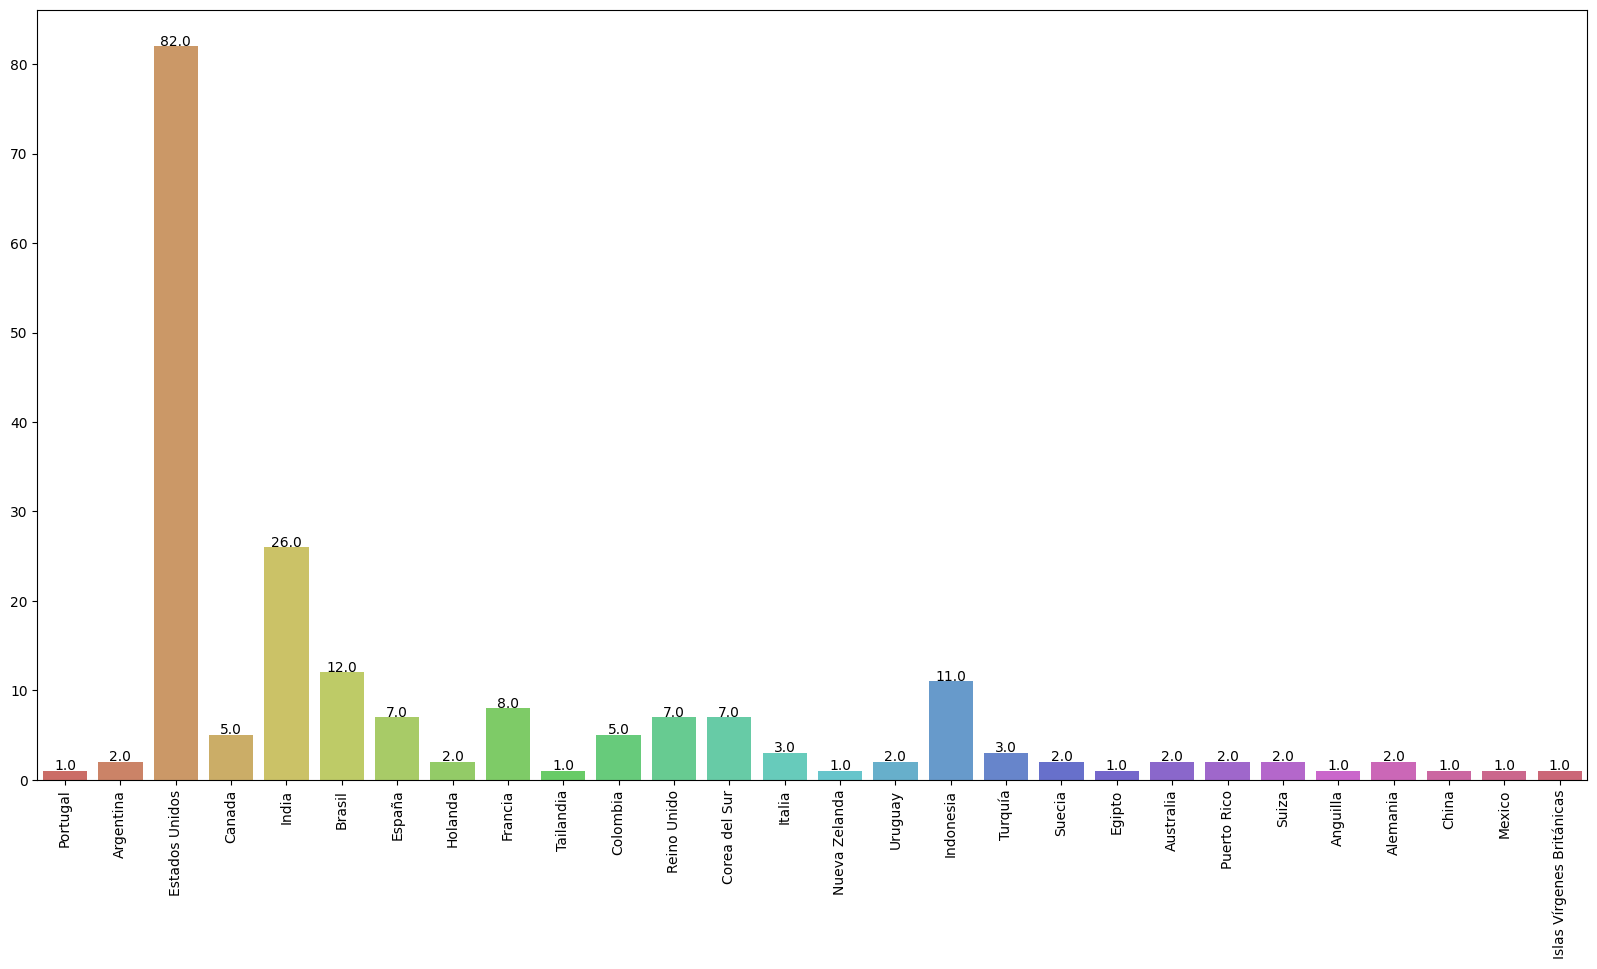

In [24]:
# Observamos la frecuencia de cada país en el dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Congifuramos el tamaño de la figura
fig, ax1 = plt.subplots(figsize=(20, 10))
graph = sns.countplot(ax=ax1, x='País', hue='País', data=df, palette='hls', legend=False) 

# Rotamos las etiquetas del eje x
ax1.set_xticks(range(len(df['País'].unique())))
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)

# Agregamos las etiquetas de cada barra
ax1.set_ylabel('')
ax1.set_xlabel('')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center")

# Se muestra el gráfico
plt.show()

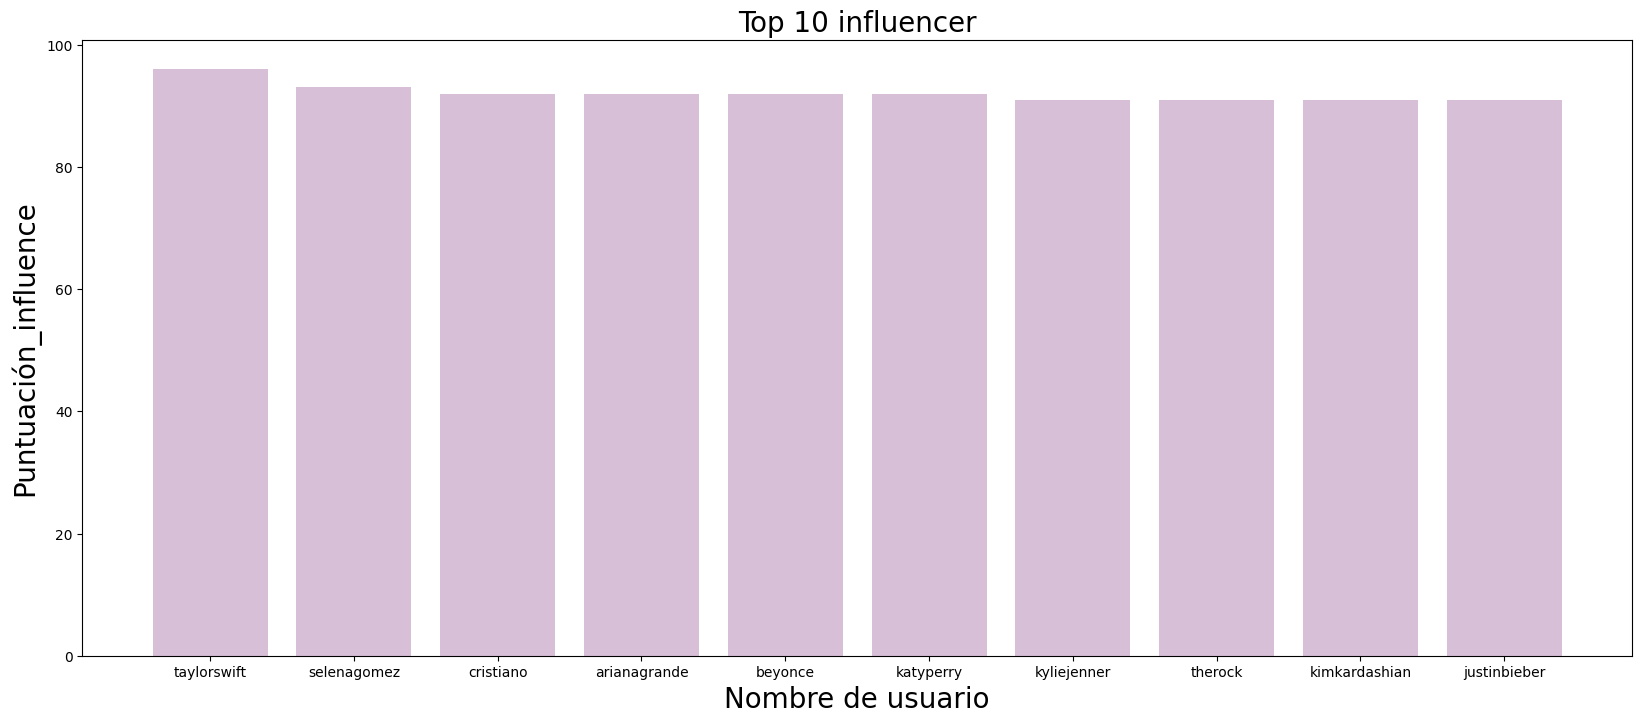

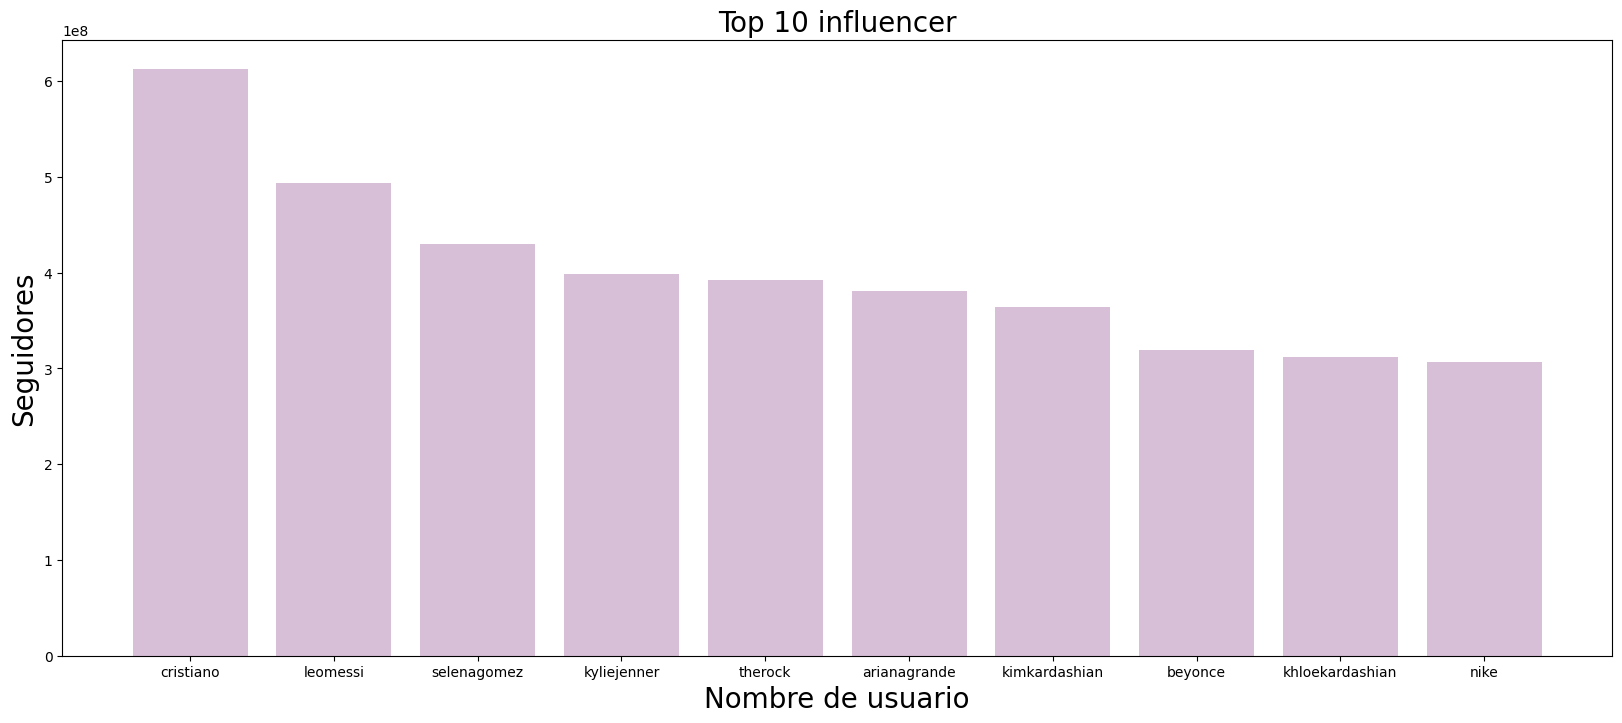

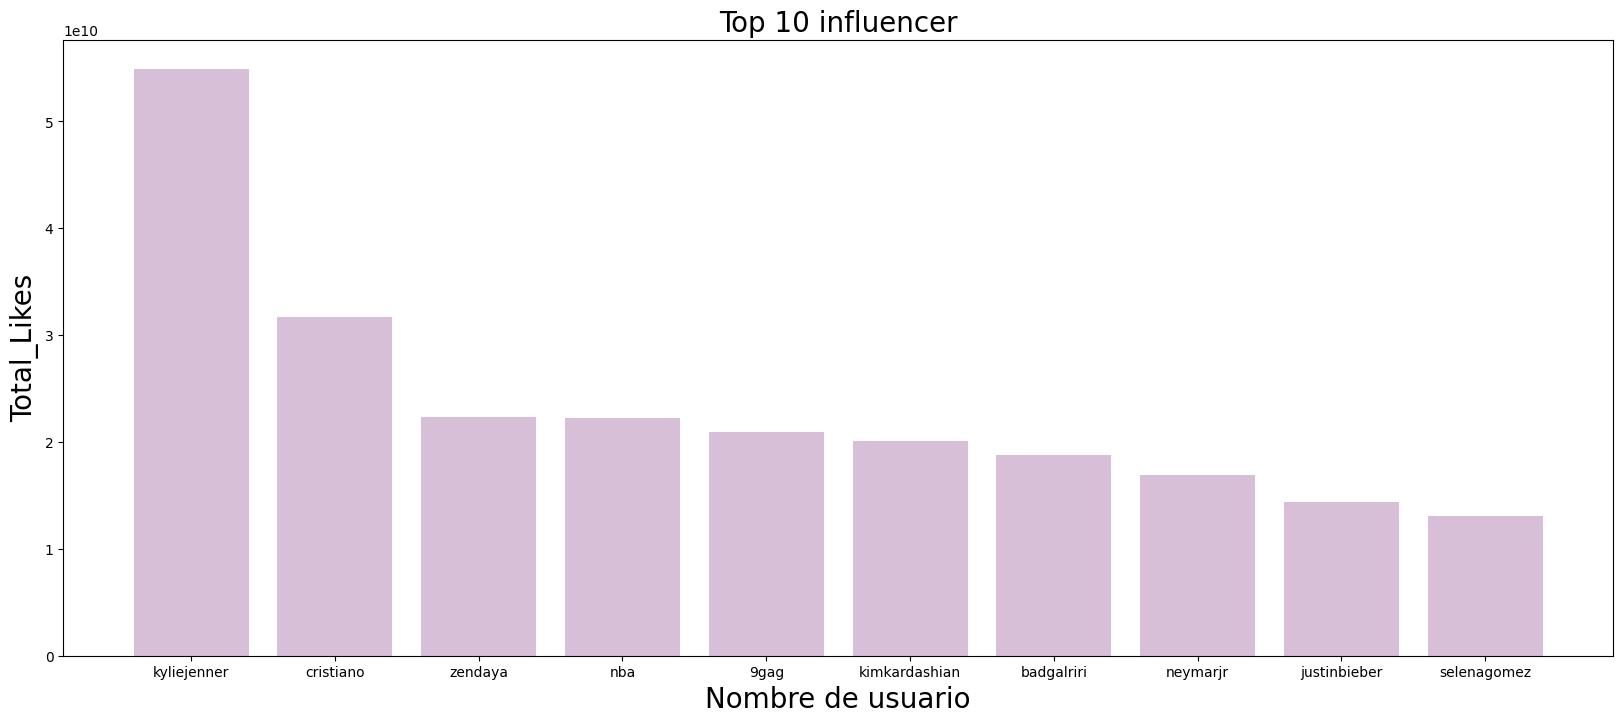

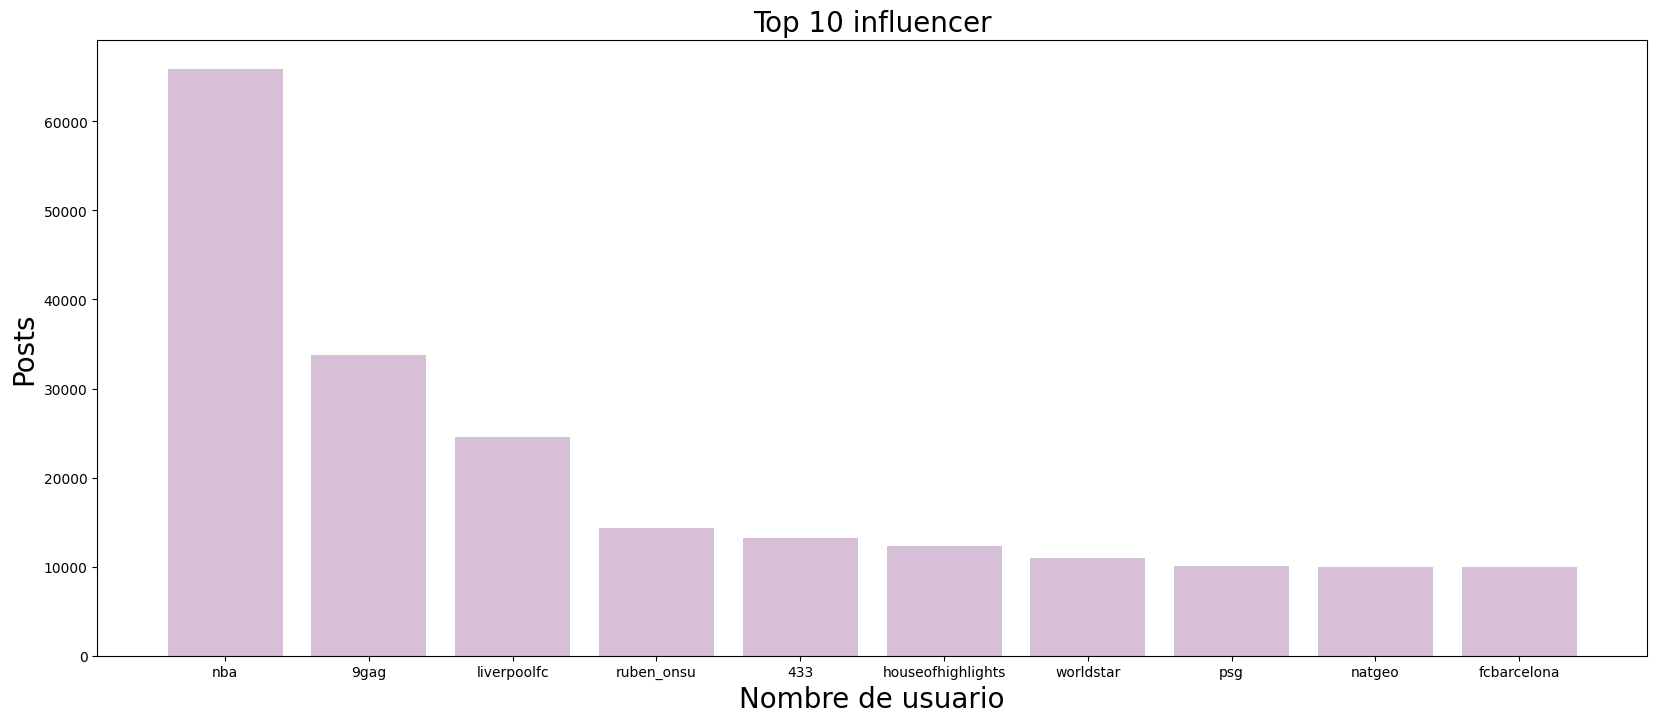

In [25]:
# Genera gráficos de barras para visualizar los 10 mejores bloggers basados en características numéricas especificadas

# variable de columnas a observar
num_features=['Puntuación_influence', 'Seguidores', 'Total_Likes','Posts']

for column in num_features:
  top10 = df.nlargest(10,column)
  plt.figure(figsize=(20,8))
  plt.bar(top10['Usuario'], top10[column],color='#D8BFD8')
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Nombre de usuario", fontsize = 20)
  plt.title("Top 10 influencer", fontsize = 20)

## 2.1 DISTRIBUCIÓN Y COMPORTAMIENTO DE LOS DATOS

In [26]:
df['Total_interacciones'].min()

0.0

In [27]:
df2.columns

Index(['Usuario', 'Puntuación_influence', 'Seguidores', 'Media_likes', 'Posts',
       'Tasa_interacción_60d', 'Media_Likes_Post_Nuevo', 'Total_Likes', 'País',
       'Idioma_principal', 'Total_interacciones'],
      dtype='object')

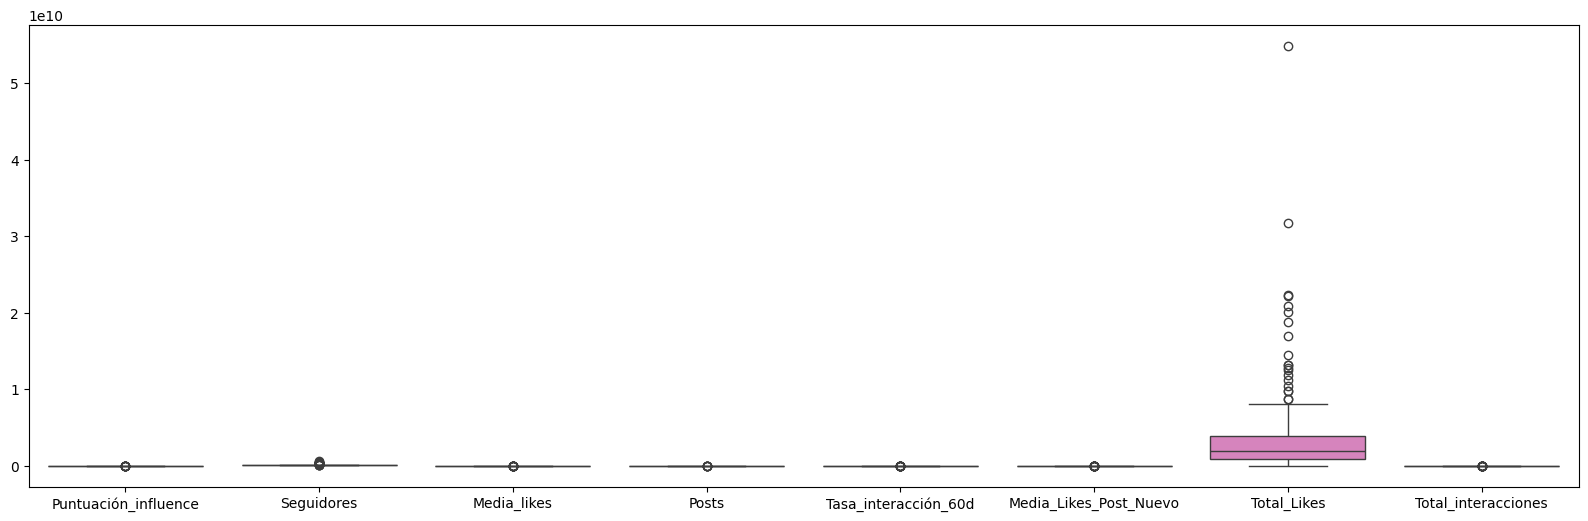

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# selección de columnas para graficar
columns_to_exclude = ['País', 'Idioma_principal', 'Usuario']

# Seleccionamos todas las columnas excepto las que queremos excluir
columns_to_include = [col for col in df2.columns if col not in columns_to_exclude]

# Graficamos los boxplots para estas columnas
plt.figure(figsize=(20, 6))
sns.boxplot(data=df2[columns_to_include])
plt.show()


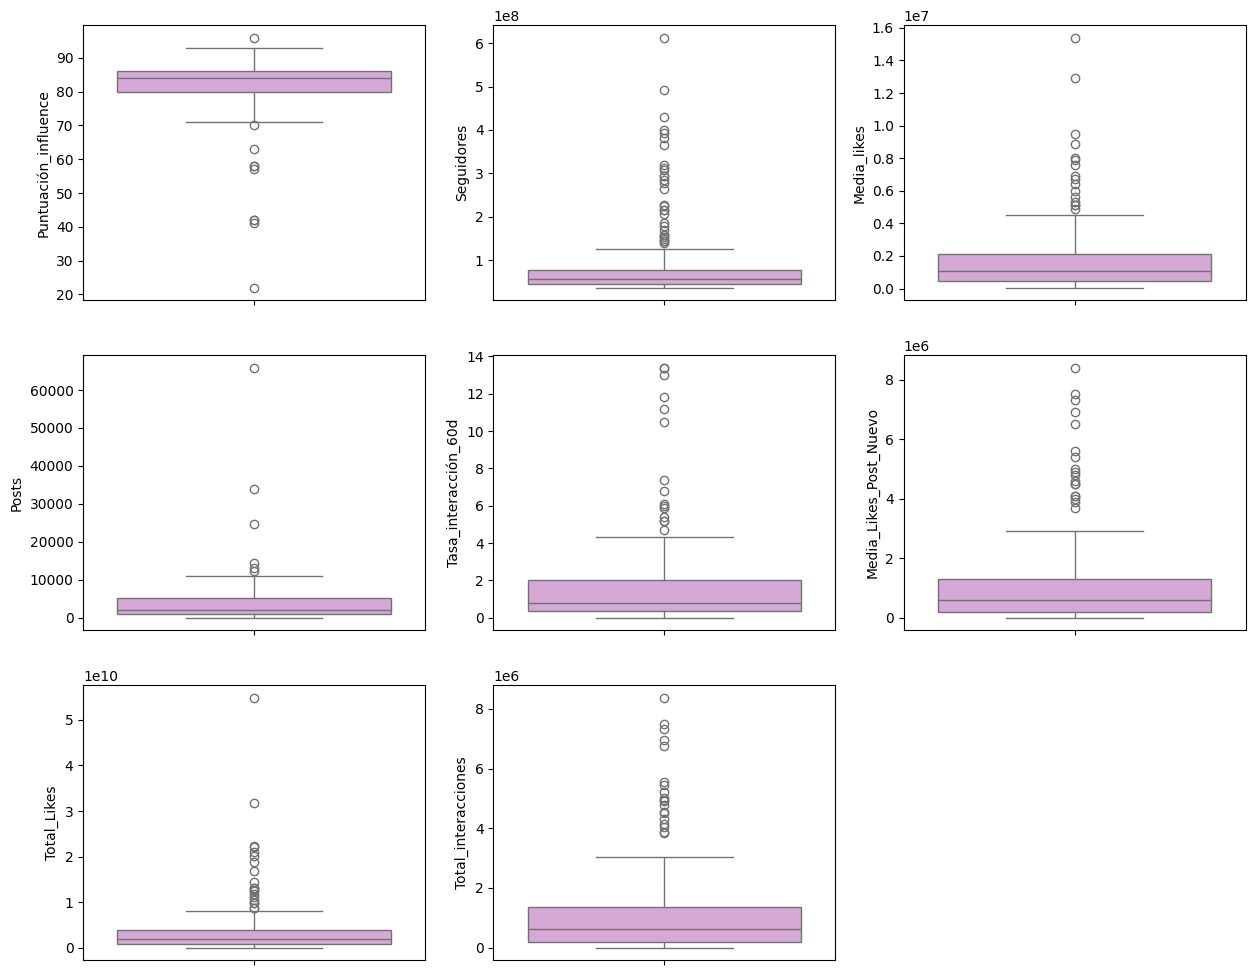

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical features
num_features = ['Puntuación_influence', 'Seguidores', 'Media_likes', 'Posts', 'Tasa_interacción_60d', 'Media_Likes_Post_Nuevo',
                'Total_Likes', 'Total_interacciones']

# Set up the subplots
i = 1
plt.figure(figsize=(15, 25))
for feature in num_features:
    plt.subplot(6, 3, i)
    sns.boxplot(y=df2[feature], color='#DDA0DD')
    i += 1

plt.show()


### Tras observar de cerca, concluimos que por la naturaleza de los mismos no se pueden considerar outliers a reparar

In [30]:
# Generamos nuevo df sin variables categóricas

df3=df2.copy()
df3=df3.drop(['Usuario', 'País', 'Idioma_principal'], axis=1)
df3

,Puntuación_influence,Seguidores,Media_likes,Posts,Tasa_interacción_60d,Media_Likes_Post_Nuevo,Total_Likes,Total_interacciones
0,92.0,612600000,8900000,3600,1.1,6500000,31700000000,6738600.0
1,90.0,493100000,7600000,1100,1.0,4600000,8700000000,4931000.0
2,93.0,430100000,6700000,2000,1.0,4099999,13100000000,4301000.0
3,91.0,398900000,8000000,6900,0.7,2900000,54900000000,2792300.0
4,91.0,392800000,1700000,7500,0.3,982900,12500000000,1178400.0
...,...,...,...,...,...,...,...,...
195,72.0,37500000,138200,160,0.4,148900,22100000,150000.0
196,79.0,37500000,213400,10000,0.3,104200,2100000000,112500.0
197,76.0,37200000,369700,1600,0.6,227200,593700000,223200.0
198,85.0,36800000,2800000,165,1.1,382800,464000000,404800.0


<Figure size 1200x800 with 0 Axes>

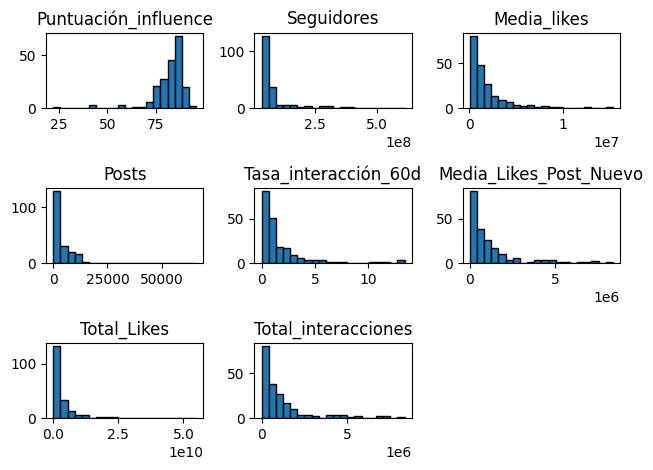

In [31]:
# Distribución de variables numéricas

import matplotlib.pyplot as plt
import seaborn as sns

# Crear histogramas 
plt.figure(figsize=(12, 8))
df3.hist(bins=20, edgecolor='black', grid=False)
plt.tight_layout()
plt.show()


GRÁFICOS DE DISPERSIÓN

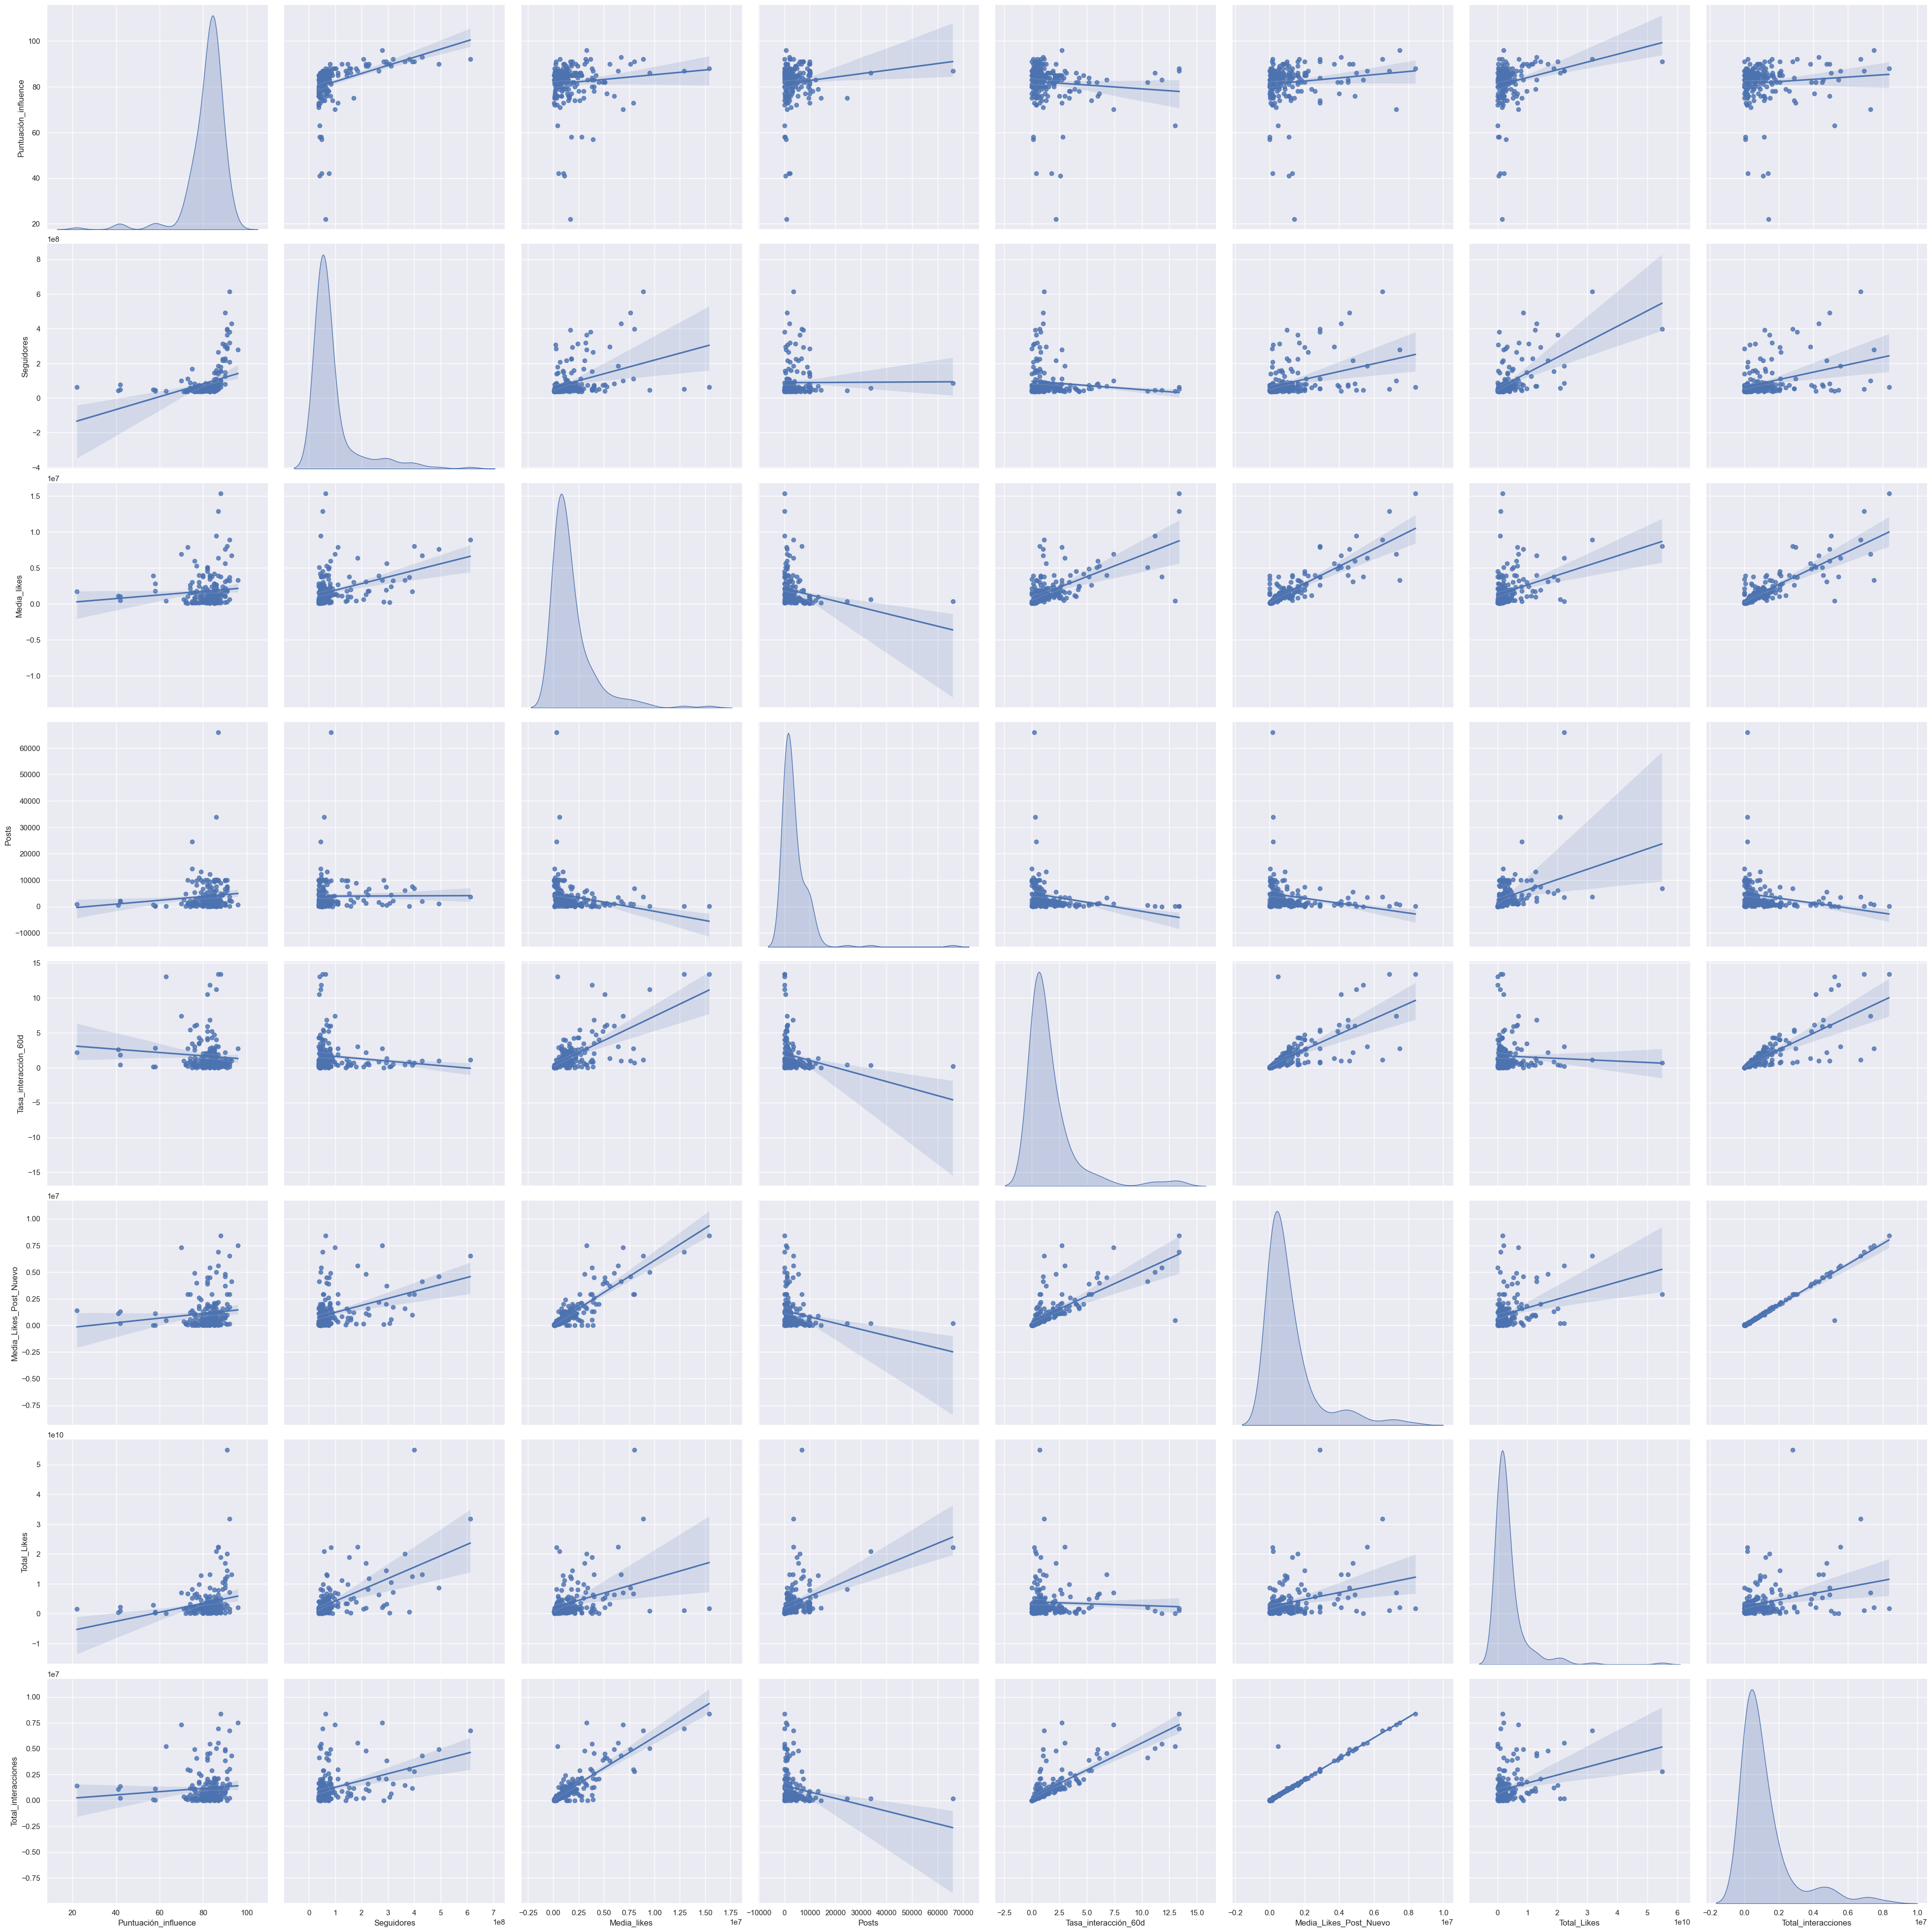

In [32]:
# Crear gráficos de dispersión para pares de variables numéricas
sns.set()
sns.pairplot(df,height = 5 ,kind ='reg',diag_kind='kde')
plt.show()

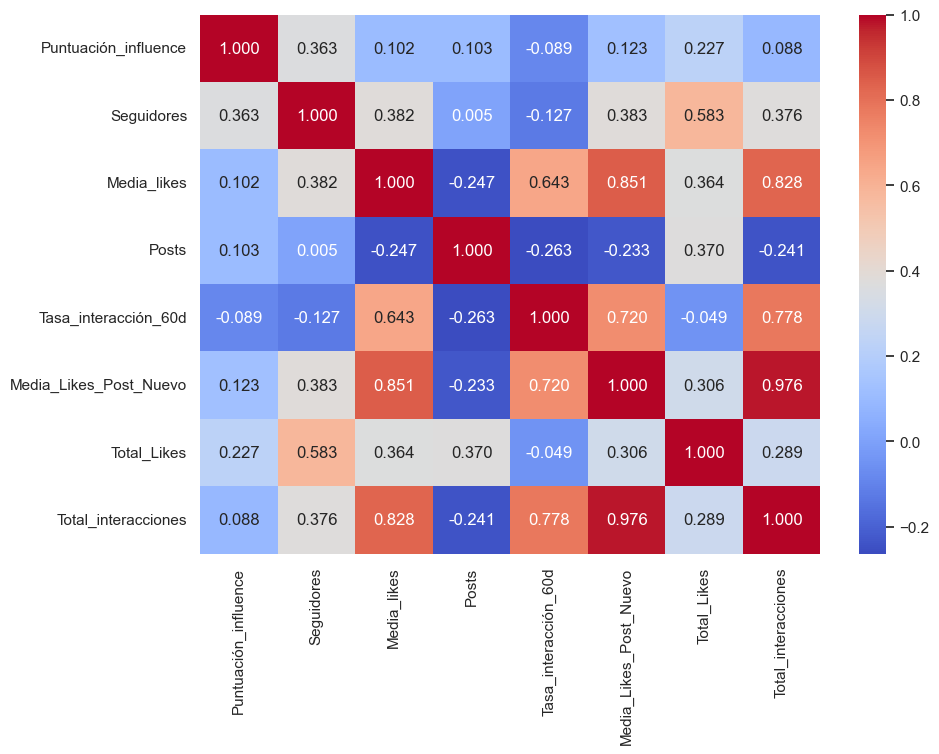

In [33]:
plt.figure(figsize=(10,7))  # Incrementa el tamaño si es necesario
sns.heatmap(df3.corr(), annot=True, fmt=".3f", cmap='coolwarm')  # Ajusta el formato
plt.show()

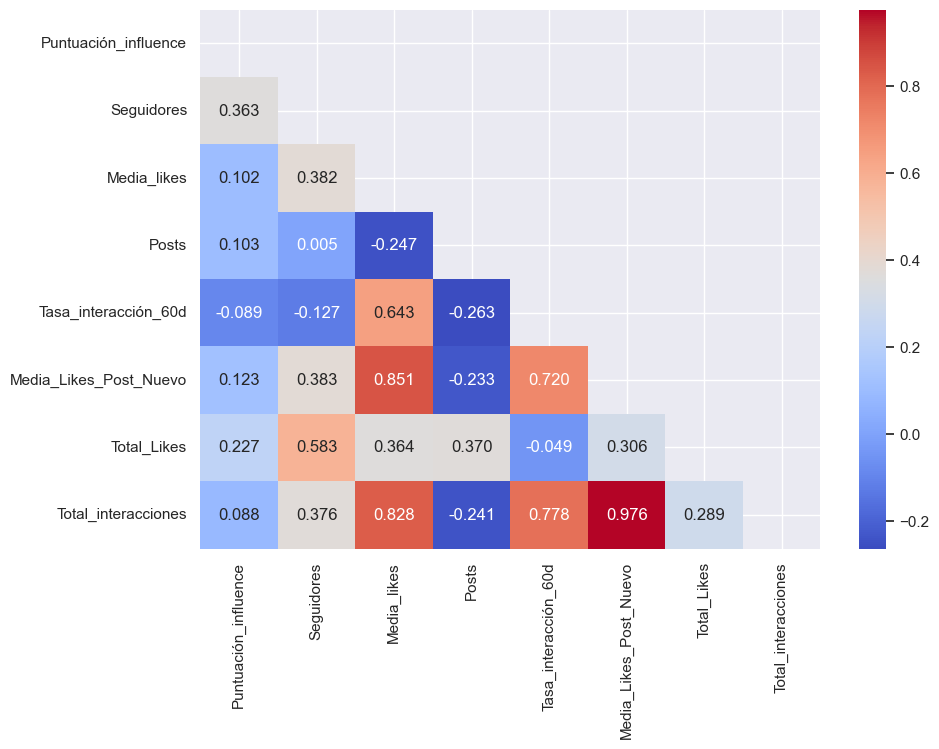

In [34]:
# máscara para el triangular inferior
mask = np.zeros_like(df3.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,7))  # Incrementa el tamaño si es necesario
sns.heatmap(df3.corr(), annot=True, fmt=".3f", cmap='coolwarm', mask=mask)  # Ajusta el formato
plt.show()

Podemos empezar a notar una cierta correlación negativa en cuando al número de post y el avg likes, indicando esto que a mayor cantidad de post mayor dispersión de los likes causando menor engament, se recomienda a los influencers que quieran apuntar alto el conseguir un equilibrio de publicación para no bajar su score de calidad

In [35]:
# obtener heatmap de manera numérica
df3.corr()

,Puntuación_influence,Seguidores,Media_likes,Posts,Tasa_interacción_60d,Media_Likes_Post_Nuevo,Total_Likes,Total_interacciones
Puntuación_influence,1.000000,0.362993,0.102311,0.102974,-0.088982,0.122978,0.226803,0.088106
Seguidores,0.362993,1.000000,0.382061,0.005372,-0.126854,0.383031,0.582878,0.375804
Media_likes,0.102311,0.382061,1.000000,-0.246973,0.642716,0.850520,0.363847,0.827529
Posts,0.102974,0.005372,-0.246973,1.000000,-0.263078,-0.233426,0.369504,-0.240542
Tasa_interacción_60d,-0.088982,-0.126854,0.642716,-0.263078,1.000000,0.719696,-0.048746,0.778500
Media_Likes_Post_Nuevo,0.122978,0.383031,0.850520,-0.233426,0.719696,1.000000,0.306415,0.976472
Total_Likes,0.226803,0.582878,0.363847,0.369504,-0.048746,0.306415,1.000000,0.289040
Total_interacciones,0.088106,0.375804,0.827529,-0.240542,0.778500,0.976472,0.289040,1.000000


# <center> 3. ANÁLISIS DE DATOS CONFIRMATORIO (CDA)

### ¿Tienen más Seguidores los que están en el 10% con más Total_Likes?

In [36]:
df3.head()

,Puntuación_influence,Seguidores,Media_likes,Posts,Tasa_interacción_60d,Media_Likes_Post_Nuevo,Total_Likes,Total_interacciones
0,92.0,612600000,8900000,3600,1.1,6500000,31700000000,6738600.0
1,90.0,493100000,7600000,1100,1.0,4600000,8700000000,4931000.0
2,93.0,430100000,6700000,2000,1.0,4099999,13100000000,4301000.0
3,91.0,398900000,8000000,6900,0.7,2900000,54900000000,2792300.0
4,91.0,392800000,1700000,7500,0.3,982900,12500000000,1178400.0


In [37]:
# importamos bibliotecas para el ab testing
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# realizamos un test de normalidad de las variables
print(stats.normaltest(df3['Seguidores']))
print(stats.normaltest(df3['Total_Likes']))

NormaltestResult(statistic=148.25469193273395, pvalue=6.410659183832219e-33)
NormaltestResult(statistic=232.3782435703979, pvalue=3.4650184506734886e-51)


In [38]:
# Rechazada la normalidad, realizamos un test de mann whitney

top_10_likes = df3[df3['Total_Likes'] >= df3['Total_Likes'].quantile(0.9)]['Seguidores']
resto_likes = df3[df3['Total_Likes'] < df3['Total_Likes'].quantile(0.9)]['Seguidores']

In [39]:
_, p_value_likes = stats.mannwhitneyu(top_10_likes, resto_likes)
print(p_value_likes)

1.581540771327198e-08


Tras realizar un test de Mann-Whitney, el p-valor obtenido (1.581540771327198e-08) indica que **rechazamos la hipótesis nula**, por lo que hay una diferencia significativa entre el 10% de usuarios con más likes y el total de seguidores

In [40]:
print  (top_10_likes.mean())
print ( '    vs    ')
print (resto_likes.mean())

237825000.0
    vs    
71896111.09444444


Al comparar las medias de los grupos comparados, podemos concluir que la diferencia significativa corresponde con una correlación positiva. **Más total likes corresponde con más seguidores**.

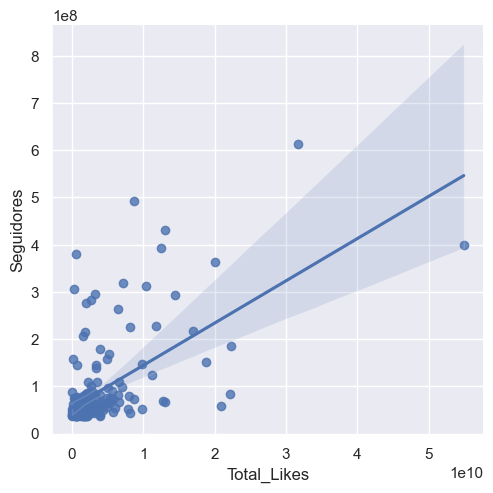

In [41]:
# observamos gráficamente
sns.pairplot(df3, x_vars=['Total_Likes'], y_vars='Seguidores', height=5, aspect=1, kind='reg')
plt.show()


### ¿Tienen más Total_interacciones los que están en el 10% con más Posts?

In [42]:
# realizamos un test de normalidad de las variables
print(stats.normaltest(df3['Total_interacciones']))
print(stats.normaltest(df3['Posts']))

NormaltestResult(statistic=110.12764269705553, pvalue=1.2192316720319603e-24)
NormaltestResult(statistic=280.6464522737773, pvalue=1.1439240898709827e-61)


In [43]:
# Rechazada la normalidad, realizamos un test de mann whitney

top_10_posts = df3[df3['Posts'] >= df3['Posts'].quantile(0.9)]['Total_interacciones']
resto_posts = df3[df3['Posts'] < df3['Posts'].quantile(0.9)]['Total_interacciones']

In [44]:
_, p_value_posts = stats.mannwhitneyu(top_10_posts, resto_posts)
print(p_value_posts)

1.1394432769938303e-07


Tras realizar un test de Mann-Whitney, el p-valor obtenido (1.1394432769938303e-07) **rechazamos la hipótesis nula**, por lo que hay una diferencia significativa entre el 10% de usuarios con más posts y el total de interacciones.

In [45]:
print  (top_10_posts.mean())
print ( '    vs    ')
print (resto_posts.mean())

182909.0909090909
    vs    
1302787.6402865169


Al comparar las medias de los grupos, podemos concluir que la diferencia significativa corresponde es con una correlación negativa. **Más posts corresponde con menos interacciones totales**.

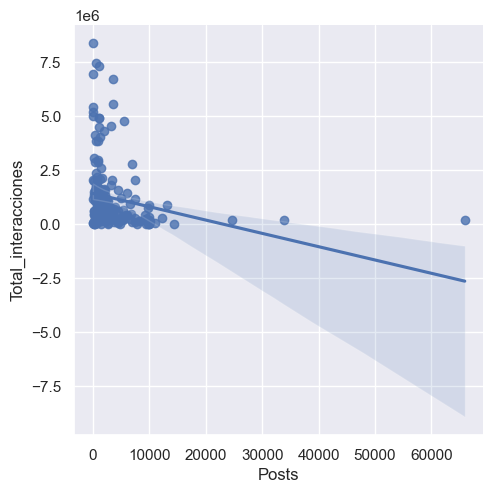

In [46]:
# observamos gráficamente 
sns.pairplot(df3, x_vars=['Posts'], y_vars='Total_interacciones', height=5, aspect=1, kind='reg')
plt.show()


# <center> 4. MACHINE LEARNING 

In [47]:
# observamos df para preparar el modelo
df.head()

,Usuario,Puntuación_influence,Seguidores,Media_likes,Posts,Tasa_interacción_60d,Media_Likes_Post_Nuevo,Total_Likes,País,Idioma_principal,Total_interacciones
0,cristiano,92.0,612600000,8900000,3600,1.1,6500000,31700000000,Portugal,Inglés,6738600.0
1,leomessi,90.0,493100000,7600000,1100,1.0,4600000,8700000000,Argentina,Español,4931000.0
2,selenagomez,93.0,430100000,6700000,2000,1.0,4099999,13100000000,Estados Unidos,Inglés,4301000.0
3,kyliejenner,91.0,398900000,8000000,6900,0.7,2900000,54900000000,Estados Unidos,Inglés,2792300.0
4,therock,91.0,392800000,1700000,7500,0.3,982900,12500000000,Estados Unidos,Inglés,1178400.0


In [48]:
from pycaret.regression import *

In [49]:
# que columnas tenemos y cuales elegimos para el modelo
df.columns

Index(['Usuario', 'Puntuación_influence', 'Seguidores', 'Media_likes', 'Posts',
       'Tasa_interacción_60d', 'Media_Likes_Post_Nuevo', 'Total_Likes', 'País',
       'Idioma_principal', 'Total_interacciones'],
      dtype='object')

In [50]:
# creamos df para modelo
df_pred = df.copy()
df_pred_new = df_pred[['Puntuación_influence', 'Seguidores', 'Media_likes', 'Posts','Tasa_interacción_60d', 'Media_Likes_Post_Nuevo', 'Total_Likes', 'País','Idioma_principal', 'Total_interacciones']]

In [51]:
# comprobamos la elección
df_pred_new.head()

,Puntuación_influence,Seguidores,Media_likes,Posts,Tasa_interacción_60d,Media_Likes_Post_Nuevo,Total_Likes,País,Idioma_principal,Total_interacciones
0,92.0,612600000,8900000,3600,1.1,6500000,31700000000,Portugal,Inglés,6738600.0
1,90.0,493100000,7600000,1100,1.0,4600000,8700000000,Argentina,Español,4931000.0
2,93.0,430100000,6700000,2000,1.0,4099999,13100000000,Estados Unidos,Inglés,4301000.0
3,91.0,398900000,8000000,6900,0.7,2900000,54900000000,Estados Unidos,Inglés,2792300.0
4,91.0,392800000,1700000,7500,0.3,982900,12500000000,Estados Unidos,Inglés,1178400.0


In [52]:
# convertimos a csv para posible uso en azure ml
df_pred_new.to_csv('dataV4.csv', index=False)

In [53]:
# iniciamos el entorno de pycaret
setup(df_pred_new, target="Puntuación_influence")

,Description,Value
0,Session id,4142
1,Target,Puntuación_influence
2,Target type,Regression
3,Original data shape,"(200, 10)"
4,Transformed data shape,"(200, 39)"
5,Transformed train set shape,"(140, 39)"
6,Transformed test set shape,"(60, 39)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [54]:
# comparamos modelos
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.6036,73.1086,7.5293,0.0564,0.1177,0.0791,0.0520
omp,Orthogonal Matching Pursuit,5.2179,73.4806,7.6261,0.0458,0.1178,0.0852,0.0160
et,Extra Trees Regressor,4.7494,75.0307,7.6669,0.0024,0.1196,0.0812,0.0410
dummy,Dummy Regressor,5.6515,81.9267,8.1548,-0.0683,0.1237,0.0909,0.0160
lasso,Lasso Regression,5.3590,80.0151,8.0989,-0.0861,0.1234,0.0876,0.3530
en,Elastic Net,5.3718,80.3455,8.1157,-0.0906,0.1235,0.0877,0.0190
ada,AdaBoost Regressor,5.4619,77.6910,7.9581,-0.0912,0.1219,0.0882,0.0270
ridge,Ridge Regression,5.4571,79.8883,8.1932,-0.2208,0.1245,0.0883,0.0190
br,Bayesian Ridge,5.4741,90.5230,8.5145,-0.2408,0.1273,0.0894,0.0160
llar,Lasso Least Angle Regression,5.4893,90.3569,8.5291,-0.2445,0.1275,0.0896,0.0170


In [55]:
# creamos modelo Random Forest Regressor 
# la elección se basa en el mejor R2 y el menor MAE
# resultados obtenidos en la primera ejecución
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2057,19.4386,4.4089,0.3577,0.0561,0.0396
1,2.8736,16.6217,4.0770,0.2710,0.0505,0.0362
2,4.0843,24.2280,4.9222,-0.2214,0.0606,0.0497
3,5.0171,57.1795,7.5617,-0.0731,0.1032,0.0684
4,4.5971,30.2026,5.4957,-0.3309,0.0690,0.0590
5,4.0786,23.5851,4.8565,-0.2927,0.0608,0.0505
6,6.9079,136.6972,11.6918,0.0525,0.1850,0.1163
7,3.0786,18.7186,4.3265,0.7133,0.0591,0.0417
8,5.7243,128.9560,11.3559,0.0899,0.1845,0.1055


In [56]:
# Tuneamos los hiperparámetros
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3751,15.6860,3.9606,0.4817,0.0483,0.0410
1,4.0090,31.1535,5.5815,-0.3663,0.0680,0.0508
2,4.0593,20.0927,4.4825,-0.0129,0.0540,0.0486
3,5.4904,53.9615,7.3458,-0.0127,0.0997,0.0731
4,4.0395,22.8695,4.7822,-0.0077,0.0601,0.0514
5,3.9810,20.0997,4.4833,-0.1017,0.0553,0.0493
6,8.1633,142.6721,11.9445,0.0110,0.1854,0.1291
7,4.2622,36.1425,6.0119,0.4464,0.0800,0.0578
8,6.2017,130.1497,11.4083,0.0815,0.1852,0.1115


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [57]:
# evaluamos el modelo
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [58]:
# finalizamos el modelo
final_rf = finalize_model(tuned_rf)

In [59]:
# guardamos 
save_model(final_rf,'RF_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Seguidores', 'Media_likes',
                                              'Posts', 'Tasa_interacción_60d',
                                              'Media_Likes_Post_Nuevo',
                                              'Total_Likes',
                                              'Total_interacciones'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['País', 'Idioma_principal'],
                                     transformer=SimpleImputer(st...
                  TransformerWrapper(include=['País', 'Idioma_principal'],
                                     transformer=OneHotEncoder(cols=['País',
                                                                     'Idioma_principal'],
                                                               handle

# <center> 5. EXTRA

### Mapa de palabras

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Additional Instagram-related words
additional_words = [
    'Explore', 'Trending', 'Storytime', 'Carousel', 'Profile', 'Influencer', 'Authentic', 'Aesthetics',
    'Engagement', 'Algorithm', 'Explore Page', 'Double Tap', 'Notification', 'Discover', 'Insta-worthy',
    'Grid', 'IG Story', 'Swipe Up', 'Caption Contest', 'Boomerang', 'IGTV Series', 'Moments', 'Behind the Scenes',
    'Link in Bio', 'Sponsored', 'IG Analytics', 'Insights', 'Carousel', 'Live Stream', 'Memories', 'Shareable',
    'Emoji', 'Emoji Story', 'Filters Galore', 'ThrowbackThursday', 'FlashbackFriday', 'Explore Feed', 'Reactions',
    'Highlights', 'DMs Open', 'Shoutout', 'Challenges', 'Branding', 'Selfie', 'OOTD', 'Self-care Sunday', 'FOMO',
    'Wanderlust', 'Tag a Friend', 'TBT'
]

# Example data for 'top50'
top50 = {
    'words': ['feed', 'post', 'caption', 'like', 'comment', 'story', 'highlight', 'IGTV', 'hashtag', 'DM',
              'follow', 'follower', 'unfollow', 'bio:', 'tagged', 'filters', 'tagged', 'IG live', 'geotagging', 'reels'],
    'counts': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 95, 85, 75, 65, 55, 45, 35, 25, 15, 5, 1]
}

# Combine additional_words and top50['words']
all_words = top50['words'] + additional_words
all_counts = top50['counts'] + [1] * len(additional_words)

def instagram_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    instagram_colors = {
        "feed": "#405DE6",  # Instagram Blue
        "post": "#FD1D1D",  # Instagram Red
        "caption": "#F77737",  # Instagram Orange
        "like": "#833AB4",  # Instagram Purple
        "comment": "#F77737",  # Instagram Orange (similar to caption)
        "story": "#FD1D1D",  # Instagram Red (similar to post)
        "highlight": "#833AB4",  # Instagram Purple (similar to like)
        "IGTV": "#FD1D1D",  # Instagram Red (similar to post)
        "hashtag": "#F77737",  # Instagram Orange (similar to caption)
        "DM": "#405DE6",  # Instagram Blue (similar to feed)
        "follow": "#FD1D1D",  # Instagram Red (similar to post)
        "follower": "#F77737",  # Instagram Orange (similar to caption)
        "unfollow": "#405DE6",  # Instagram Blue (similar to feed)
        "bio:": "#FD1D1D",  # Instagram Red (similar to post)
        "tagged": "#F77737",  # Instagram Orange (similar to caption)
        "filters": "#405DE6",  # Instagram Blue (similar to feed)
        "IG live": "#FD1D1D",  # Instagram Red (similar to post)
        "geotagging": "#F77737",  # Instagram Orange (similar to caption)
        "reels": "#833AB4",  # Instagram Purple (similar to like)
    }

    return instagram_colors.get(word, "#000000")  # Default to black for unmatched words

# Generate the WordCloud
cvec_dict = dict(zip(all_words, all_counts))

wordcloud = WordCloud(width=800, height=400, background_color="white", color_func=instagram_color_func)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)

# Display the WordCloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

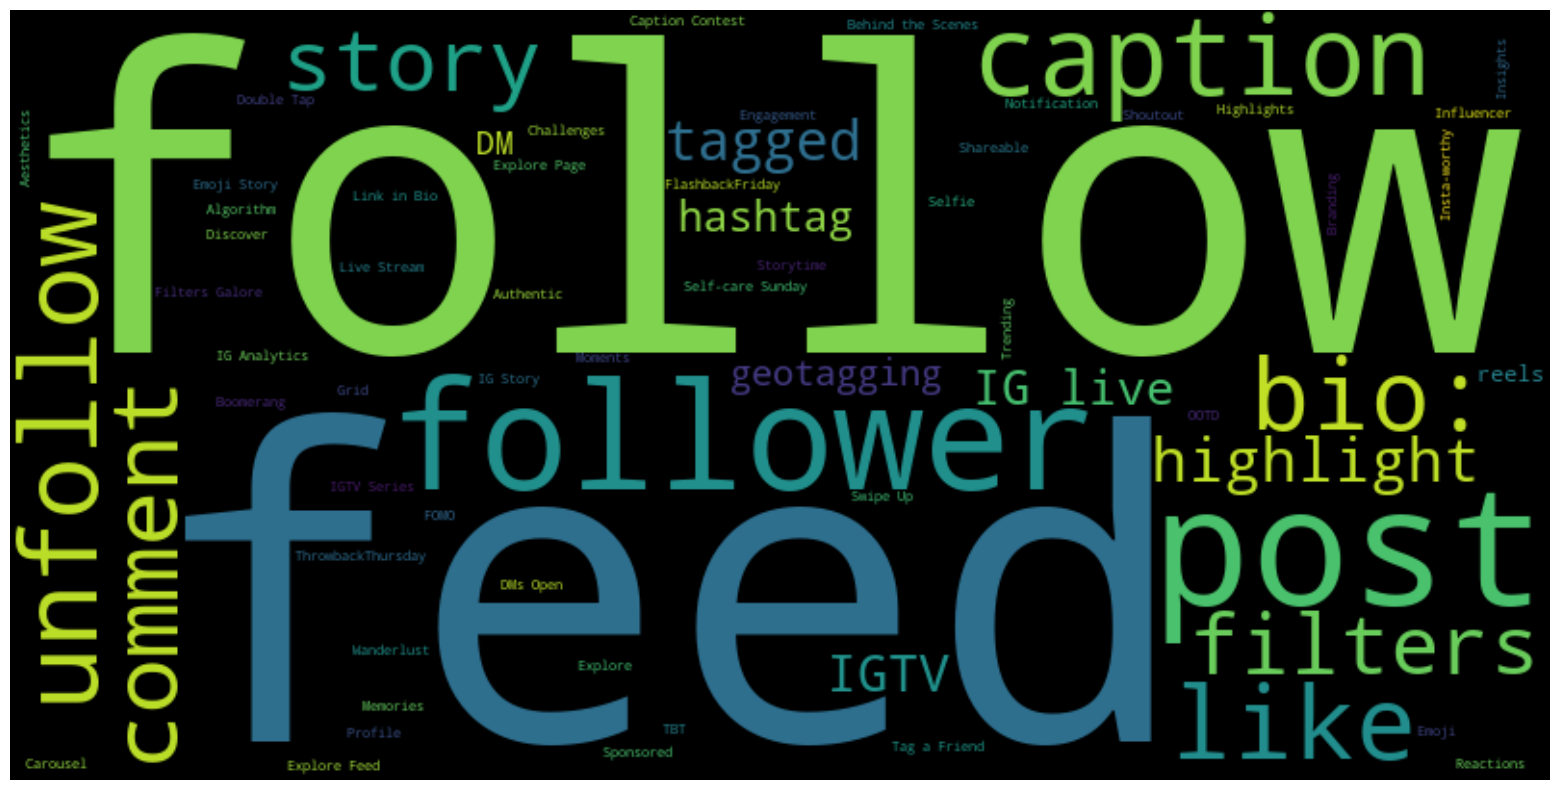

In [ ]:
cvec_dict = dict(zip(all_words, all_counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

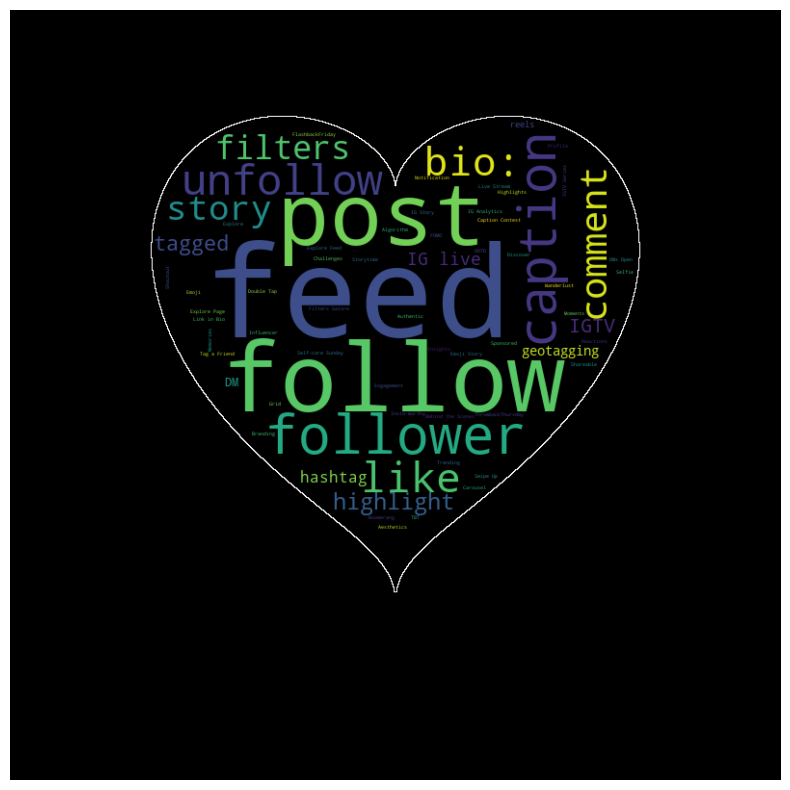

In [ ]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Creando una máscara en forma de corazón más grande y orientada hacia arriba
x = np.linspace(-2.5, 2.5, 800)
y = np.linspace(-2.5, 2.5, 800)
X, Y = np.meshgrid(x, y)
F = (X**2 + (1.2*Y + 0.9*np.sqrt(np.abs(X)))**2 - 2.5)
mask = F < 0
 
# Convertir la máscara en un formato adecuado para WordCloud
mask = 255 * (1 - mask.astype(int))  # Invertimos la máscara para que las palabras estén dentro del corazón
 
# Generando la nube de palabras con la máscara y fondo negro
wordcloud = WordCloud(width=800, height=800, background_color="black", mask=mask, contour_width=1, contour_color='white')
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
 
# Mostrando la nube de palabras
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()